In [8]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [9]:
data= pd.read_csv('List of Countries by Sugarcane Production.csv')

In [10]:
df= data.copy()

In [11]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [12]:
df.shape

(103, 7)

## Dataset cleaning

In [13]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [14]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [15]:
df = df.drop( "Unnamed: 0", axis = 1)

In [16]:
df.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns= {"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)
df.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [17]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [18]:
df.isna().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [19]:
df[df["Acreage(Hectare)"].isnull()]

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [20]:
#  Both null value in same row, than we can drop this

df = df.dropna().reset_index().drop("index", axis = 1)

In [21]:
df

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8


In [22]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

In [23]:
# check data type

df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [24]:
# convert some str value in float value

df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_person(Kg)"] = df["Production_per_person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)

In [25]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

## Univariate Analysis

In [19]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


Check how many Countries produce Sugercane from each continent

In [20]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

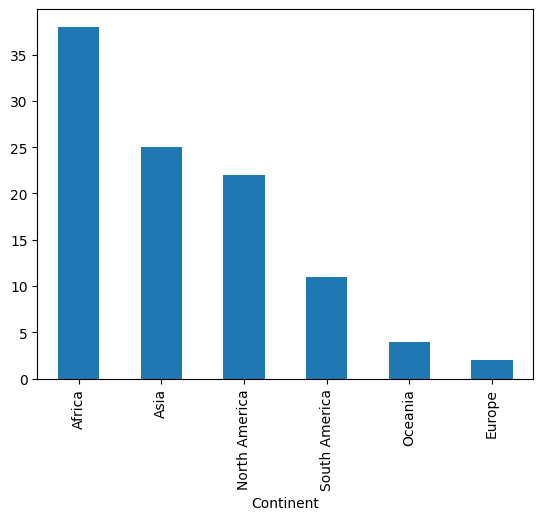

In [21]:
df['Continent'].value_counts().plot(kind= 'bar')

<Axes: ylabel='count'>

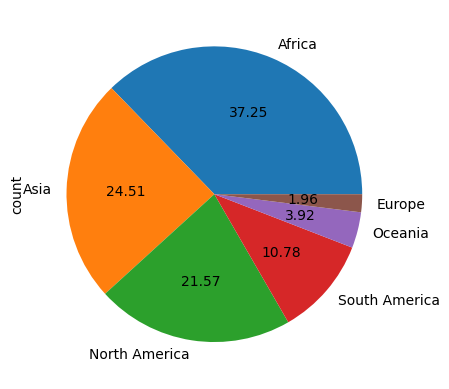

In [22]:
df['Continent'].value_counts().plot(kind= 'pie', autopct='%.2f')

### Distribution of columns

C:\Users\Satyam Kumar Pandey\AppData\Local\Temp\ipykernel_23292\642271845.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
C:\Users\Satyam Kumar Pandey\AppData\Local\Temp\ipykernel_23292\642271845.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production_per_p

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

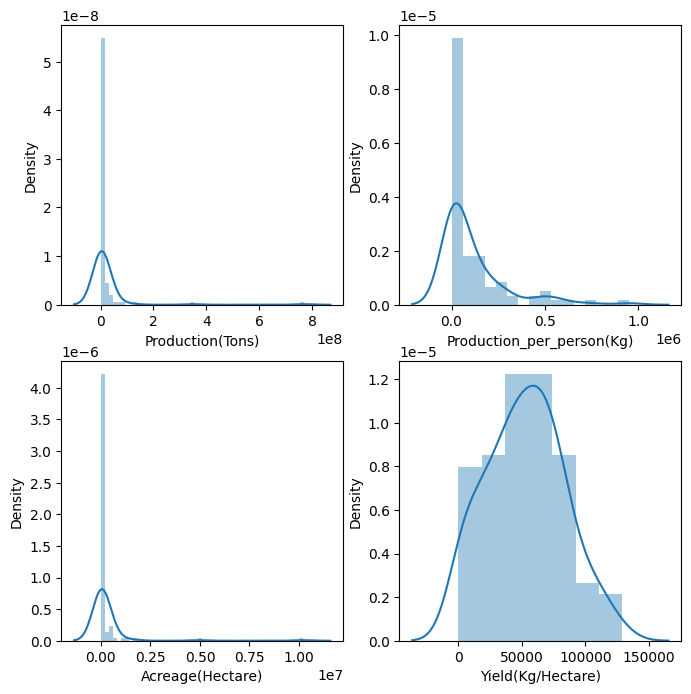

In [23]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.distplot(df['Production_per_person(Kg)'])
plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])

## checking outlier

<Axes: ylabel='Yield(Kg/Hectare)'>

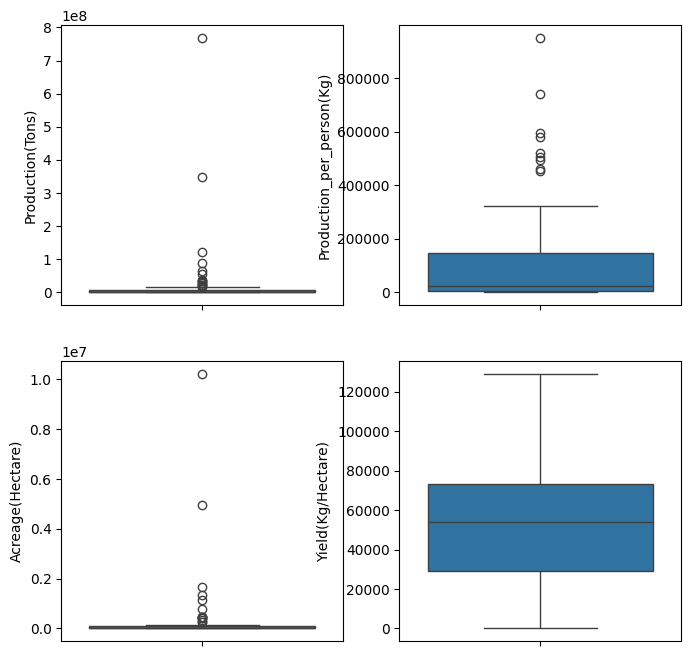

In [24]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.boxplot(df['Production_per_person(Kg)'])
plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])

<Axes: ylabel='Production(Tons)'>

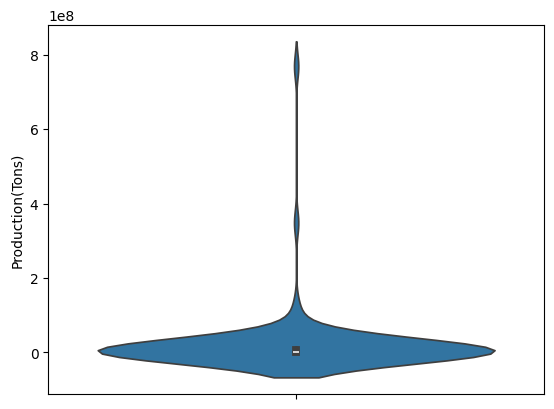

In [25]:
sns.violinplot(df["Production(Tons)"])

## Bivariate Analysis

In [26]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### Which country produces maximum sugarcane?


In [31]:
new_data= df[['Country','Production(Tons)']].set_index("Country")

In [32]:
df1=new_data.copy()

In [34]:
df1

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


add new column of total percent in df1 dataset

In [35]:
df1['Total_percent']=(df1["Production(Tons)"]*100) / (df1["Production(Tons)"]).sum()

In [37]:
df1.head(10)

,Production(Tons),Total_percent
Country,,
Brazil,768678382.0,40.727285
India,348448000.0,18.462001
China,123059739.0,6.520138
Thailand,87468496.0,4.634389
Pakistan,65450704.0,3.467809
Mexico,56446821.0,2.990751
Colombia,36951213.0,1.957805
Australia,34403004.0,1.822792
Guatemala,33533403.0,1.776718


<Axes: ylabel='Total_percent'>

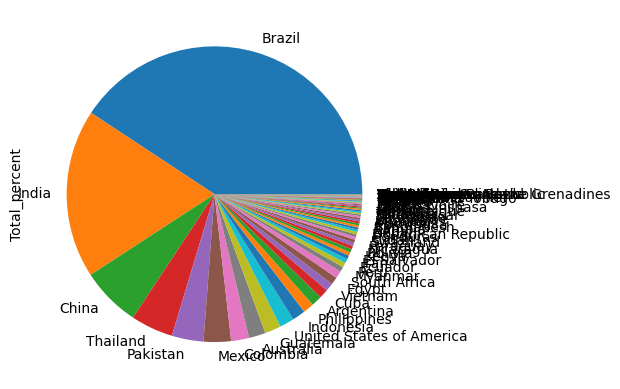

In [40]:
df1['Total_percent'].plot(kind='pie')

<Axes: ylabel='Total_percent'>

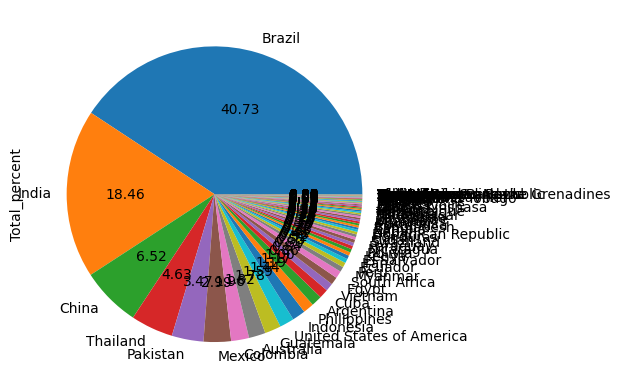

In [41]:
df1['Total_percent'].plot(kind='pie', autopct='%.2f')

<Axes: ylabel='Total_percent'>

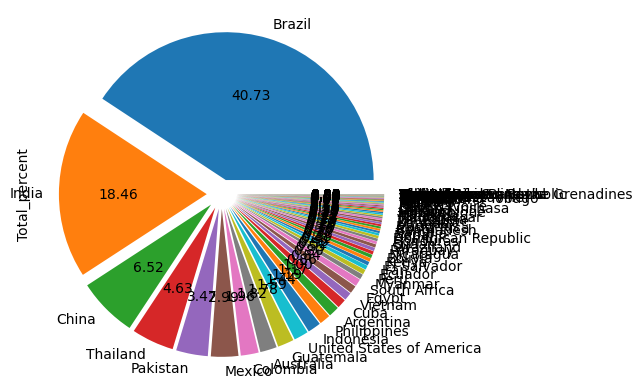

In [66]:
# Explode in pie chart

df1['Total_percent'].plot(kind='pie', autopct='%.2f',explode=[0.1] * len(df1))

<Axes: xlabel='Country'>

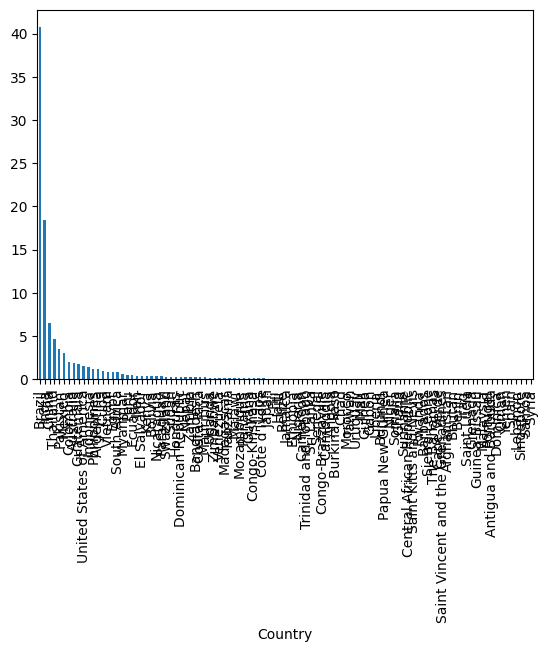

In [70]:
df1['Total_percent'].plot(kind='bar')

Text(0, 0.5, 'Percentage')

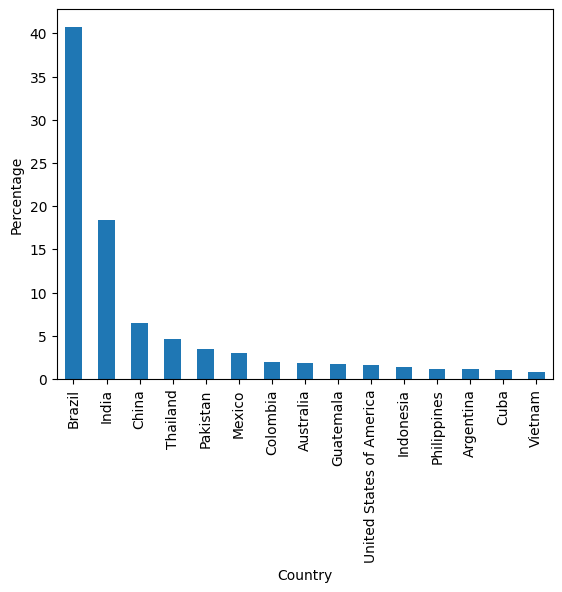

In [96]:
df1['Total_percent'].head(15).plot(kind='bar')
plt.ylabel("Percentage")

### Which Country has highest land?
1. Normally, it is not highest or lowest

In [140]:
df2=df[['Country','Acreage(Hectare)']].set_index('Country')


In [133]:
df2.head()

,Acreage(Hectare)
Country,
Brazil,10226205.0
India,4950000.0
China,1675215.0
Thailand,1336575.0
Pakistan,1130820.0


Text(0, 0.5, 'Acreage(Hectare)')

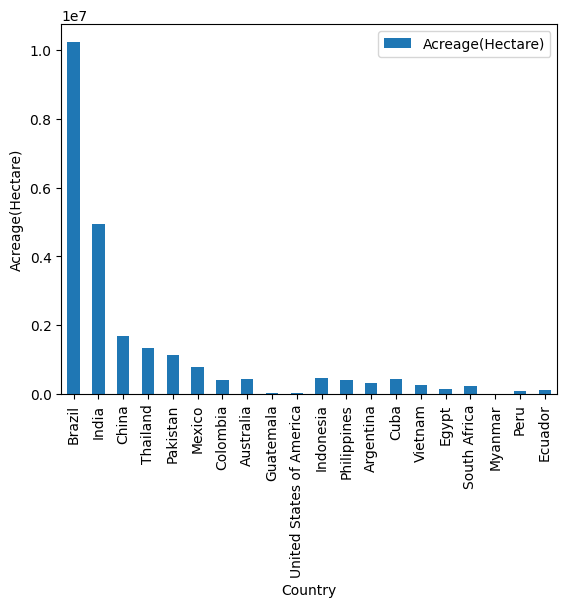

In [134]:
df2.head(20).plot(kind='bar')
plt.ylabel('Acreage(Hectare)')

<Axes: xlabel='Country', ylabel='Acreage(Hectare)'>

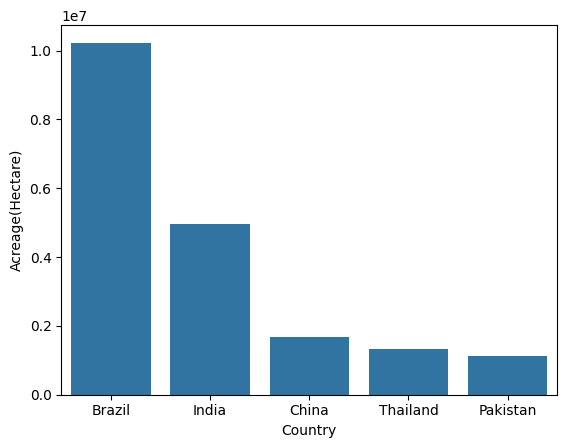

In [135]:
# by using seaborn

sns.barplot(data=df2.head(5), x='Country', y='Acreage(Hectare)')



<Axes: ylabel='Acreage(Hectare)'>

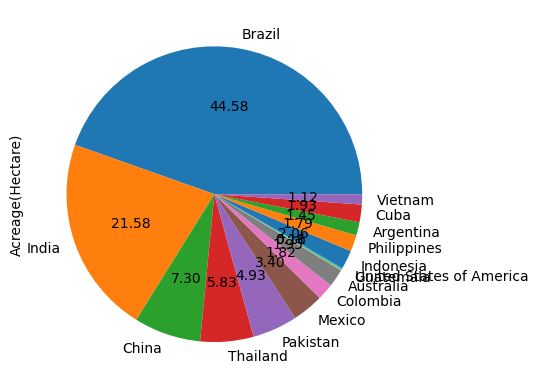

In [136]:
df2['Acreage(Hectare)'].head(15).plot(kind='pie',autopct='%0.2f')

  2. Highest 20 Acreage(Hectare) land country 

In [141]:

high= df2.sort_values('Acreage(Hectare)',ascending=False)

In [143]:
high.head(20)

,Acreage(Hectare)
Country,
Brazil,10226205.0
India,4950000.0
China,1675215.0
Thailand,1336575.0
Pakistan,1130820.0
Mexico,781054.0
Indonesia,472693.0
Australia,447204.0
Cuba,442307.0


<Axes: ylabel='Acreage(Hectare)'>

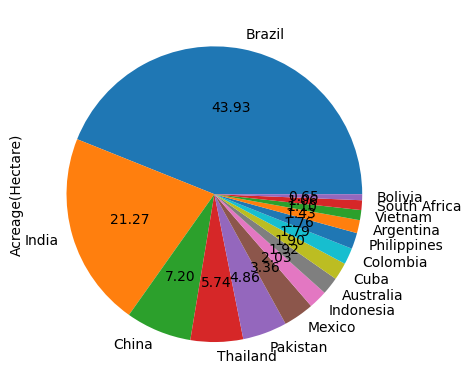

In [188]:
high['Acreage(Hectare)'].head(15).plot(kind='pie',autopct='%0.2f')

3. Lowest 20 country which have less area

In [186]:
low=df2.sort_values('Acreage(Hectare)',ascending=True)

<Axes: xlabel='Country', ylabel='Acreage(Hectare)'>

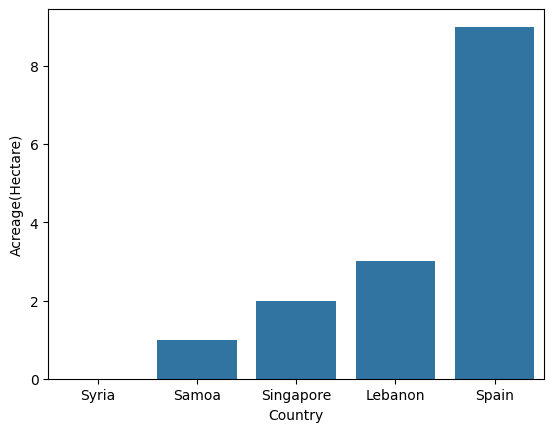

In [197]:
sns.barplot(data=low.head(5), x='Country', y='Acreage(Hectare)')


## Which Country have have highest Yield(Kg/Hectare)
1. Normal Analysis, not highest and lowest

In [169]:
df3=df[['Country','Yield(Kg/Hectare)']].set_index('Country')

In [170]:
df3.head()

,Yield(Kg/Hectare)
Country,
Brazil,75167.5
India,70393.5
China,73459.1
Thailand,65442.2
Pakistan,57879.0


<Axes: xlabel='Country'>

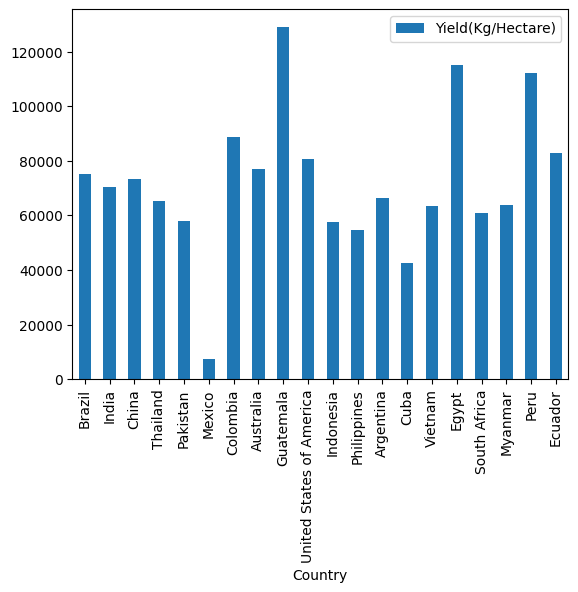

In [210]:
df3.head(20).plot(kind='bar')


<Axes: ylabel='Yield(Kg/Hectare)'>

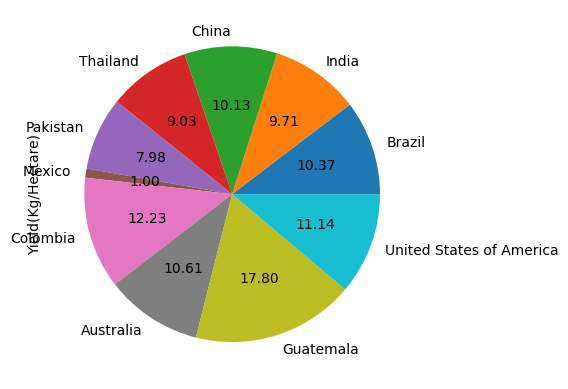

In [213]:
df3['Yield(Kg/Hectare)'].head(10).plot(kind='pie',autopct='%0.2f')

Highest Yield(Kg/Hectare)

In [215]:
highest=df3.sort_values('Yield(Kg/Hectare)',ascending=False)

In [217]:
df3.head()

,Yield(Kg/Hectare)
Country,
Brazil,75167.5
India,70393.5
China,73459.1
Thailand,65442.2
Pakistan,57879.0


<Axes: ylabel='Yield(Kg/Hectare)'>

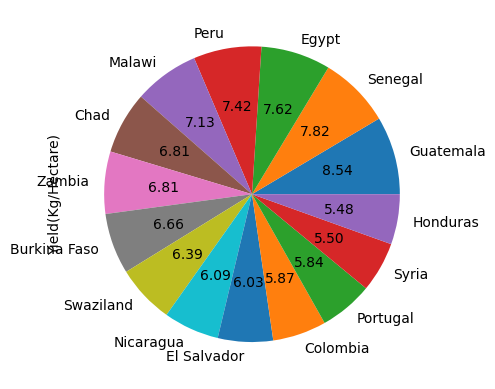

In [216]:
highest['Yield(Kg/Hectare)'].head(15).plot(kind='pie',autopct='%0.2f')

<Axes: xlabel='Country'>

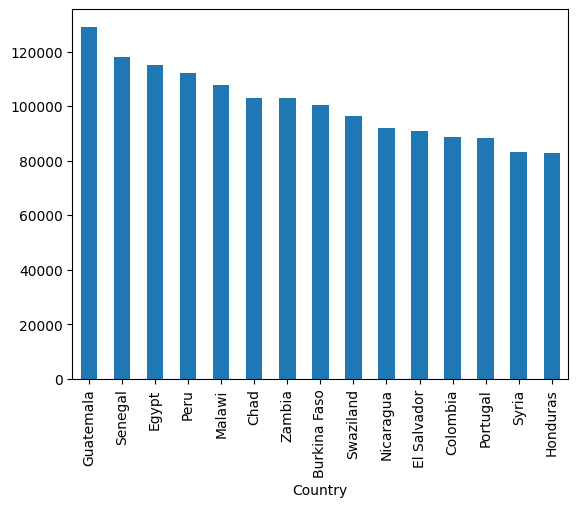

In [220]:
highest['Yield(Kg/Hectare)'].head(15).plot(kind='bar')


## Which country has highest production?

In [27]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


C:\Users\Satyam Kumar Pandey\AppData\Local\Temp\ipykernel_16524\328127327.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


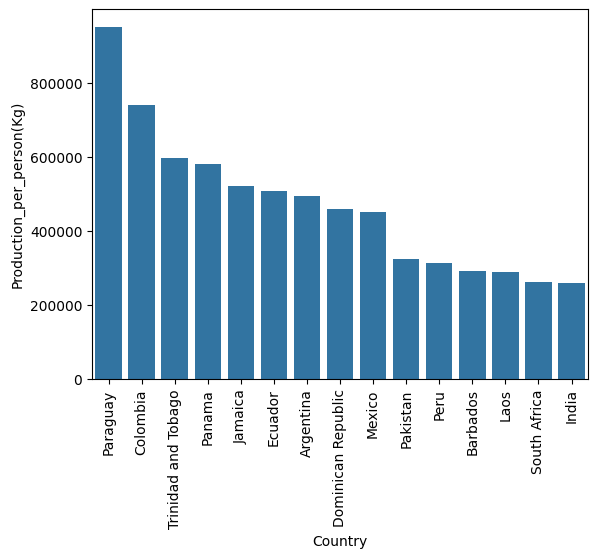

In [26]:
df_yield = df.sort_values("Production_per_person(Kg)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Production_per_person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

## Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

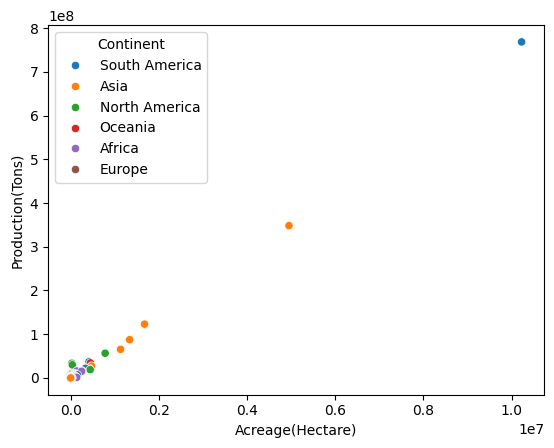

In [28]:
sns.scatterplot(data = df, x = "Acreage(Hectare)", y = "Production(Tons)", hue = "Continent" )

Overall increase in land increases the production


## Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

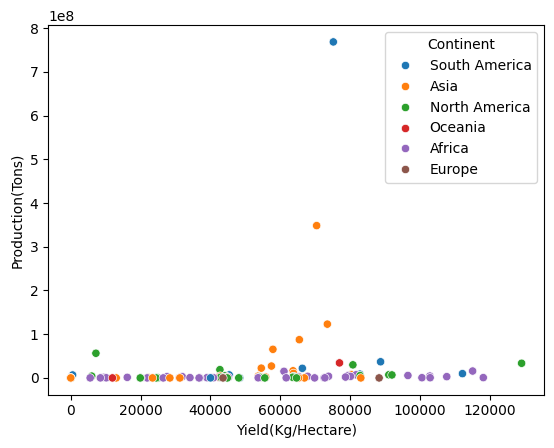

In [29]:
sns.scatterplot(data = df, x = "Yield(Kg/Hectare)" , y = "Production(Tons)", hue = "Continent")

In [30]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## Analysis for Continent

In [31]:
df_continent = df.groupby("Continent").sum()

In [32]:
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]

In [33]:
df_continent

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


### Which continent produces maximum sugarcane?

<Axes: xlabel='Continent'>

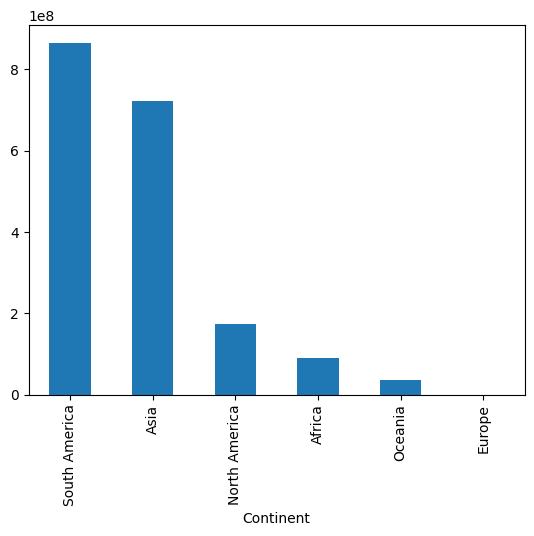

In [34]:
df_continent["Production(Tons)"].sort_values(ascending =  False).plot(kind = "bar")

## Production distribution by continent

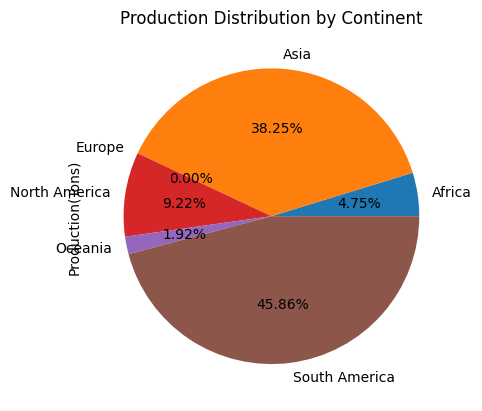

In [35]:
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')
plt.show()